In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sr = 10000
skip_sample = int(50000/sr)

data_num = 3
data_type = 'ch'

ch_list = [9]
time_list = [20, 10, 5, 1, 0.5]

@@@@@@@ 20 1000


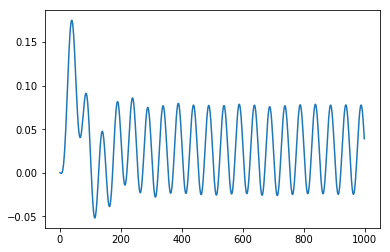

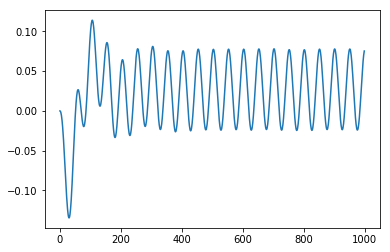

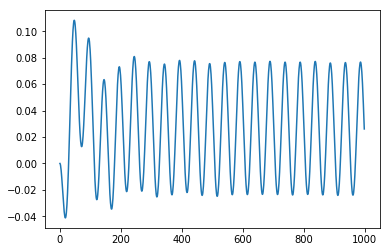

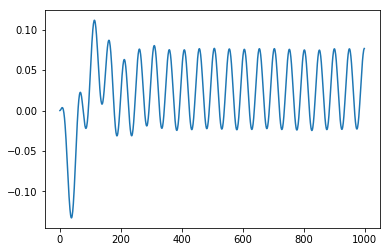

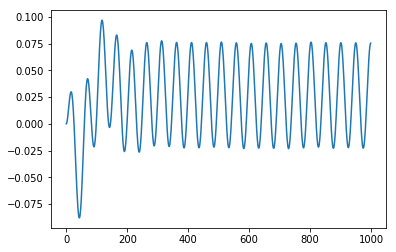

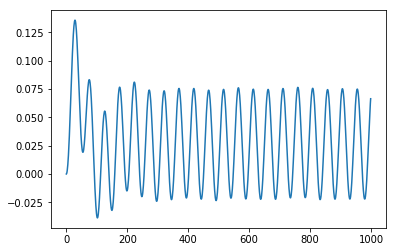

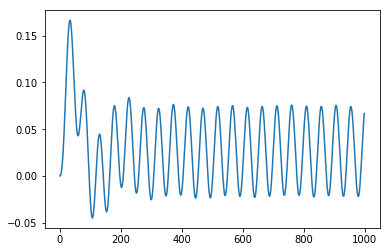

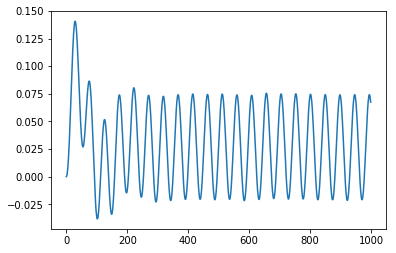

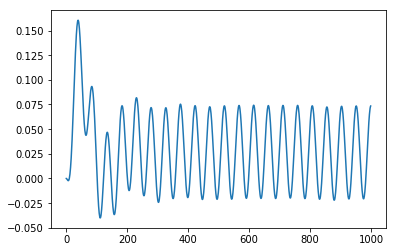

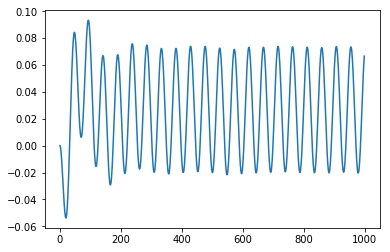

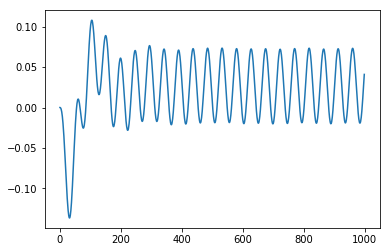

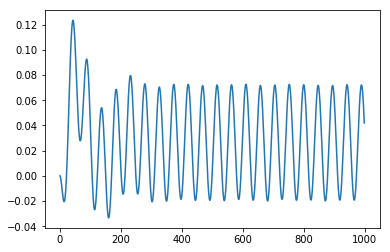

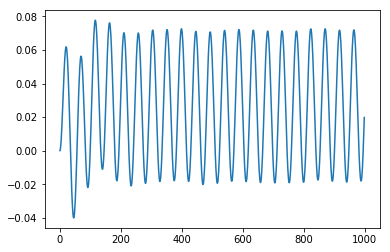

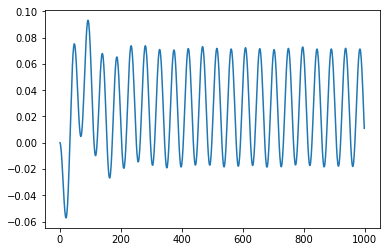

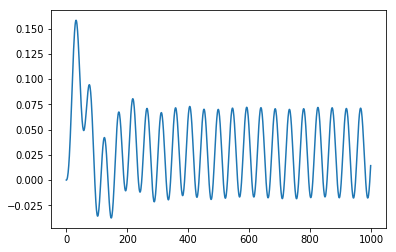

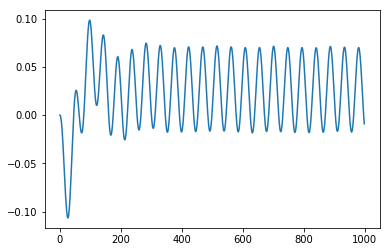

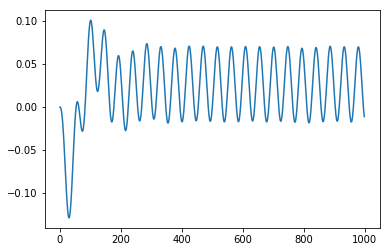

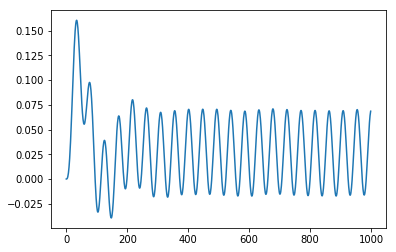

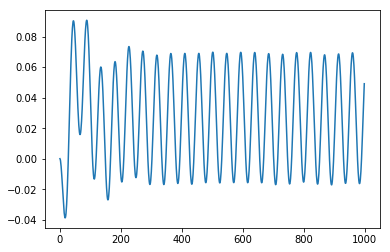

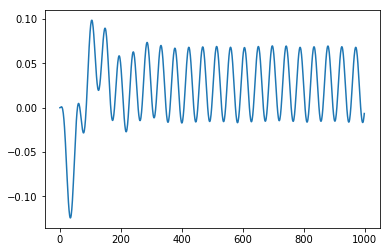

(16000, 9, 1000) (4000, 9, 1000)
(16000, 20) (4000, 20)
9ch data shape  -  20.0 ms
train set : (16000, 9, 200) (16000, 20)
test set : (4000, 9, 200) (4000, 20)
@@@@@@@ 10 500


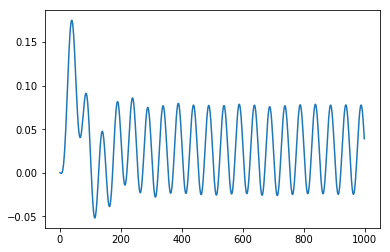

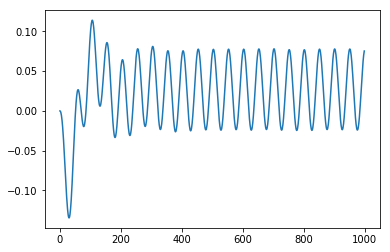

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [6]:
if data_type=='ch':
    np.random.seed(37)
    label_set = np.array([[0]*20]*20)
    for k in range(20):
        label_set[k,k]=1

    for ccc in ch_list:
        for ttt in time_list:
            ch_num = ccc
            time_len = ttt    ##ms
            point_len = int(1000/(20/time_len))
            print('@@@@@@@',time_len, point_len)

            count = -1
            for freq in range(1000,1100,5):
                count += 1
                data = np.load('data/pure_data%d/%dch/%d.npy'%(data_num, ch_num, freq))
                train = data[:800]
                test = data[800:]
                train = train[:,:,:point_len]
                test = test[:,:,:point_len]
                lab_train = np.array([label_set[count]]*len(train))
                lab_test = np.array([label_set[count]]*len(test))
                if count==0:
                    trainX = train
                    trainY = lab_train
                    testX = test
                    testY = lab_test
                else:
                    trainX = np.concatenate((trainX, train))
                    trainY = np.concatenate((trainY, lab_train))
                    testX = np.concatenate((testX, test))
                    testY = np.concatenate((testY, lab_test))

            print(np.shape(trainX), np.shape(testX))
            print(np.shape(trainY), np.shape(testY))
            np.save('npy_data/pure_data%d/%dch/%dch_%.1fms_trainX.npy'%(data_num, ch_num, ch_num, time_len), trainX[:,:,::5])
            np.save('npy_data/pure_data%d/%dch/%dch_%.1fms_trainY.npy'%(data_num, ch_num, ch_num, time_len), trainY)
            np.save('npy_data/pure_data%d/%dch/%dch_%.1fms_testX.npy'%(data_num, ch_num, ch_num, time_len), testX[:,:,::5])
            np.save('npy_data/pure_data%d/%dch/%dch_%.1fms_testY.npy'%(data_num, ch_num, ch_num, time_len), testY)

            print('%dch data shape  -  %.1f ms'%(ch_num, time_len))
            print('train set :', np.shape(trainX[:,:,::5]) , np.shape(trainY))
            print('test set :', np.shape(testX[:,:,::5]) ,np.shape(testY))

In [4]:
if data_type=='raw':
    np.random.seed(37)
    label_set = np.array([[0]*20]*20)
    for k in range(20):
        label_set[k,k]=1
    
    for ttt in time_list:
        time_len = ttt
        point_len = int(1000/(20/time_len))
        print('@@@@@@@',time_len, point_len)

        count = -1
        for freq in range(1000,1100,5):
            count += 1
            data = np.load('data/pure_data%d/raw/%d.npy'%(data_num, freq))
            train = data[:800]
            test = data[800:]
            train = train[:,:point_len]
            test = test[:,:point_len]
            lab_train = np.array([label_set[count]]*len(train))
            lab_test = np.array([label_set[count]]*len(test))

            if count==0:
                trainX = train
                trainY = lab_train
                testX = test
                testY = lab_test
            else:
                trainX = np.concatenate((trainX, train))
                trainY = np.concatenate((trainY, lab_train))
                testX = np.concatenate((testX, test))
                testY = np.concatenate((testY, lab_test))

        np.save('npy_data/pure_data%d/raw/raw_%.1fms_trainX.npy'%(data_num, time_len), trainX)
        np.save('npy_data/pure_data%d/raw/raw_%.1fms_trainY.npy'%(data_num, time_len), trainY)
        np.save('npy_data/pure_data%d/raw/raw_%.1fms_testX.npy'%(data_num, time_len), testX)
        np.save('npy_data/pure_data%d/raw/raw_%.1fms_testY.npy'%(data_num, time_len), testY)

        print('raw data shape  -  %.1f ms'%(time_len))
        print('train set :', np.shape(trainX) , np.shape(trainY))
        print('test set :', np.shape(testX) ,np.shape(testY))

@@@@@@@ 20 1000
raw data shape  -  20.0 ms
train set : (16000, 1000) (16000, 20)
test set : (4000, 1000) (4000, 20)
@@@@@@@ 10 500
raw data shape  -  10.0 ms
train set : (16000, 500) (16000, 20)
test set : (4000, 500) (4000, 20)
@@@@@@@ 5 250
raw data shape  -  5.0 ms
train set : (16000, 250) (16000, 20)
test set : (4000, 250) (4000, 20)
@@@@@@@ 1 50
raw data shape  -  1.0 ms
train set : (16000, 50) (16000, 20)
test set : (4000, 50) (4000, 20)
@@@@@@@ 0.5 25
raw data shape  -  0.5 ms
train set : (16000, 25) (16000, 20)
test set : (4000, 25) (4000, 20)
